# MunichAdjustment Basics

In [1]:
import chainladder as cl
import pandas as pd

This example demonstrates how to adjust LDFs by the relationship between Paid
and Incurred using the MunichAdjustment.


In [2]:
# Load data
mcl = cl.load_sample('mcl')

# Traditional Chainladder
cl_traditional = cl.Chainladder().fit(mcl).ultimate_

# Munich Adjustment
dev_munich = cl.MunichAdjustment(paid_to_incurred=('paid', 'incurred')).fit_transform(mcl)
cl_munich = cl.Chainladder().fit(dev_munich).ultimate_

plot1_data = cl_munich.to_frame().T.rename(
    {'incurred':'Ultimate Incurred', 'paid': 'Ultimate Paid'}, axis=1)

plot2_data = pd.concat(
    ((cl_munich['paid'] / cl_munich['incurred']).to_frame().rename(
        columns={'2261': 'Munich'}),
     (cl_traditional['paid'] / cl_traditional['incurred']).to_frame().rename(
         columns={'2261': 'Traditional'})), axis=1)

We can see how the Paid / Incurred Ultimates stay close to `1.0` for all origin periods under the `MunichAdjustment` while they diverge under the traditional `Development`.

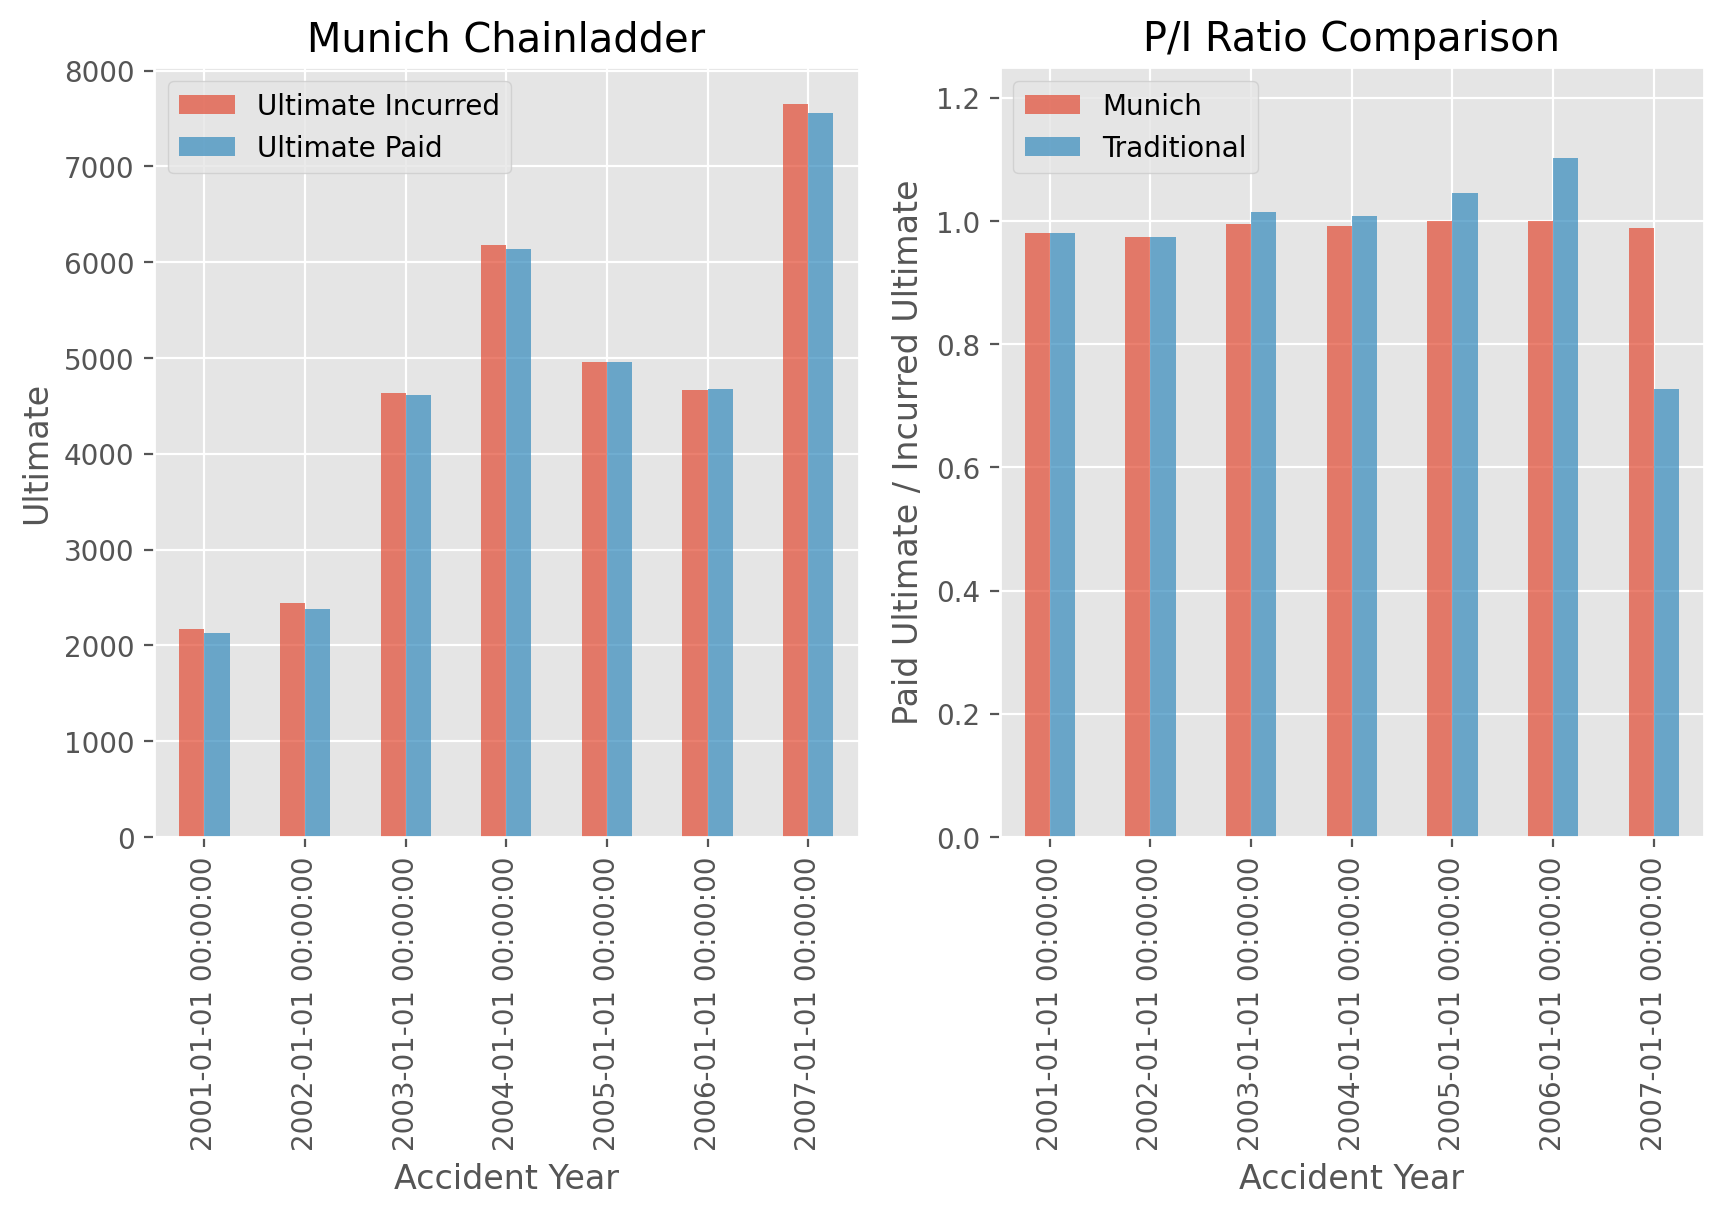

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

# Plot data
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10,5))
plot_kw = dict(kind='bar', alpha=0.7)

plot1_data.plot(
    title='Munich Chainladder', ax=ax0, **plot_kw).set(
    ylabel='Ultimate', xlabel='Accident Year')
plot2_data.plot(
    title='P/I Ratio Comparison', ax=ax1, ylim=(0,1.25), **plot_kw).set(
    ylabel='Paid Ultimate / Incurred Ultimate', xlabel='Accident Year');